# Data Science: Individual Planning Report
This R notebook will perform the individual planning stage of the data science project. The main pursuits of this report include understanding the data, formulating a specific inquiry derived from one of the three broad questions, creating several visualizations to foster greater comprehension of the data and foreseeable roadblocks, and selecting an appropriate method to address my question of interest.

In [1]:
### Run this cell before continuing to load in the necessary R packages.
library(tidyverse)
library(repr)
library(rvest)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
# Read in datasets directly from their raw URLs obtained from the GitHub repository

# Read in player.csv file
url_players <- "https://raw.githubusercontent.com/Adrian12-max/Data-Science-Project-Individual-Planning-Stage/refs/heads/main/players.csv"
players <- read_csv(url_players)
players

# Read in sessions.csv file
url_sessions <- "https://raw.githubusercontent.com/Adrian12-max/Data-Science-Project-Individual-Planning-Stage/refs/heads/main/sessions.csv"
sessions <- read_csv(url_sessions)
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


## 1. Data Description

**players.csv:** provides a list including demographic information and self-reported play statistics for each player. Each row corresponds to a unique player. This tibble contains 196 observations/rows and 7 variables/columns. The variables include:

- `experience` (character): Self-reported playing experience: *Newbie, Amateur, Regular, Veteran, or Pro*
- `subscribe` (logical): Whether the player is subscribed to the game-related newspaper (evaluates to either TRUE or FALSE)
- `hashedEmail` (character): A unique hashed identifier used to link sessions to players
- `played_hours` (double): Total number of hours the player has spent on the server
- `name` (character): The player's self-reported personal name
- `gender` (character): The player's self-reported gender 
- `Age` (double): The age of the player in years
  
**sessions.csv:** provides a list of all individual play sessions by each player, including data about the session. Each row records one play session for a player. This tibble contains 1535 observations/rows and 5 variables/columns. The variables include:

- `hashedEmail` (character): A unique hashed identifier used to link sessions to players
- `start_time` (character): The local date-time (in year-month-day hour:minute format) representing when the session began
- `end_time` (character): The local data-time (in year-month-day hour:minute format) representing when the session ended
- `original_start_time` (double): Numeric timestamp (in milliseconds since 1970-01-01 00:00:00 UTC) indicating when the session began
- `original_end_time` (double): Numeric timestamp (in milliseconds since 1970-01-01 00:00:00 UTC) indicating when the session ended

**Summary Statistics**

| Variable       | Mean  | Min  | Max    | Sum     |
| -------------- | ----- | ---- | ----   | ------  |
| `Age`          | 21.14 | 9.00 | 58.00  | 4101.00 |
| `played_hours` | 5.90  | 0.00 | 223.10 | 1145.80 | 


## 2. Questions

**Selected Broad Question:** We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**Specific Inquiry:** Can `Age`, `gender`, and `experience` predict the total number of hours played (`played_hours`) by a player in the `players.csv` dataset?

**How will the data help address this question?**

The `players.csv` dataset contains demographic information for each player, including:
- `Age` (double)
- `gender` (character)
- `experience` (character)
- `played_hours` (double)

This inquiry uses `played_hours` as the response variable and `Age` (numeric), `gender` (character), and `experience` (character) as the predictor variables. By default, the `gender` and `experience` data are stored as character strings; however, they actually represent categories (`Male`, `Female`, `Non-Binary`, etc. for `gender` and `Newbie`, `Amateur`, `Regular`, etc. for `experience`). Before running the analysis, these character variables should be converted to a factor type to ensure that the selected regression model runs properly and interprets these variables as categorical rather than arbitrary strings. Conversely, the numeric predictor variable `Age` should be retained as is because it represents a measurable, continuous quantity that can be directly included in mathematical models such as regression.

**Data Wrangling**



## 3. Exploratory Data Analysis and Visualization

In [3]:
# Read in datasets directly from their raw URLs obtained from the GitHub repository

# Read in player.csv file
url_players <- "https://raw.githubusercontent.com/Adrian12-max/Data-Science-Project-Individual-Planning-Stage/refs/heads/main/players.csv"
players_head <- read_csv(url_players) |>
head()
players_head

# Read in sessions.csv file
url_sessions <- "https://raw.githubusercontent.com/Adrian12-max/Data-Science-Project-Individual-Planning-Stage/refs/heads/main/sessions.csv"
sessions_head <- read_csv(url_sessions) |>
head()
sessions_head

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [4]:
# Convert categorical variables from character to factor types
players <- players |>
    mutate(gender = as_factor(gender),
        experience = as_factor(experience))
players

# Remove rows with any missing values
players <- players |>
    drop_na()
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [6]:
# Remove rows with any missing values
sessions <- sessions |>
    drop_na()
sessions

# Convert UNIX timestamps into human-readable date-time format
sessions <- sessions |>
    mutate(original_start_time = 
           original_end_time = 

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [16]:
# Mean value computations for each quantitative variable in the players.csv data set
players_summary <- players |>
    summarize(mean_played_hours = mean(played_hours),
        mean_age = mean(Age))


| Variable       | Mean  |
| -------------- | ----- | 
| `Age`          | 21.14 | 
| `played_hours` | 5.90  |

### Exploratory Visualizations

#### 1. Histogram of player ages:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


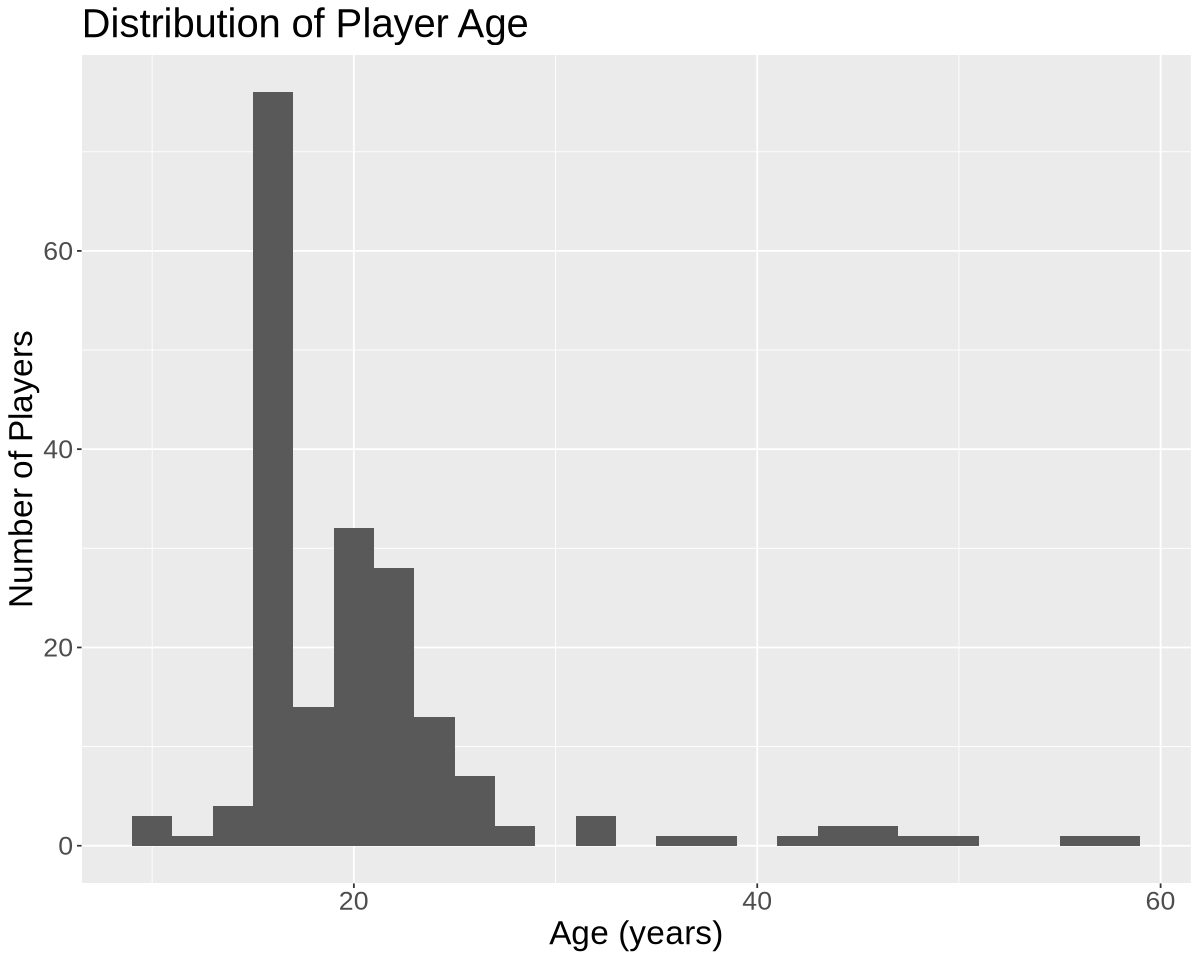

In [6]:
# Set the plot size
options(repr.plot.width = 10, repr.plot.height = 8)

# Create a histogram of player ages
age_histogram <- players |>
ggplot(aes(x = Age)) +  # map Age to the x-axis
    geom_histogram(binwidth = 2) +  # use 2-year bins
    labs(title = "Distribution of Player Age",  # main title for plot
         x = "Age (years)",  # x-axis title
         y = "Number of Players") +  # y-axis title
    theme(text = element_text(size = 20))
age_histogram

#### 2. Mean total play hours by experience level (bar graph):

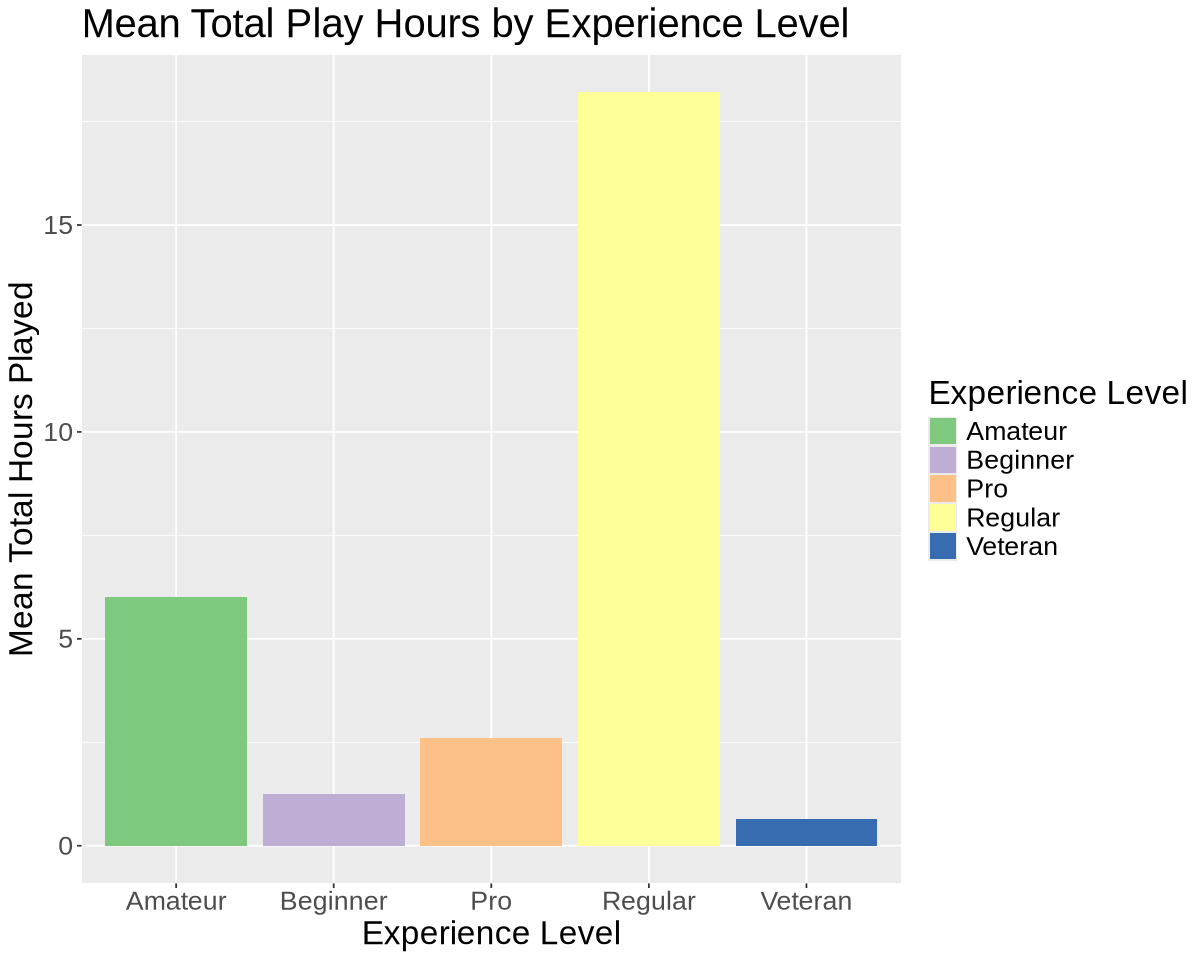

In [23]:
# Summarize the mean total play hours by experience level
mean_hours_by_experience <- players |>
    group_by(experience) |>
    summarize(mean_hours = mean(played_hours, na.rm = TRUE))

# Set the plot size
options(repr.plot.width = 10, repr.plot.height = 8)

# Bar plot of mean hours by experience level
mean_hours_by_experience_plot <- mean_hours_by_experience |>
    ggplot(aes(x = experience, y = mean_hours, fill = experience)) + # fill bars according to experience level
    geom_bar(stat = "identity") +  # tell ggplot to use given y values instead of count for determining bar height
    labs(title = "Mean Total Play Hours by Experience Level",
         x = "Experience Level",
         y = "Mean Total Hours Played", 
         fill = "Experience Level") + # label the legend of the fill variable
         scale_fill_brewer(palette = 'Accent') + # apply a colour-blind-friendly palette
         theme(text = element_text(size = 20))
mean_hours_by_experience_plot

#### 3. Scatterplot of total play hours vs. age:

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


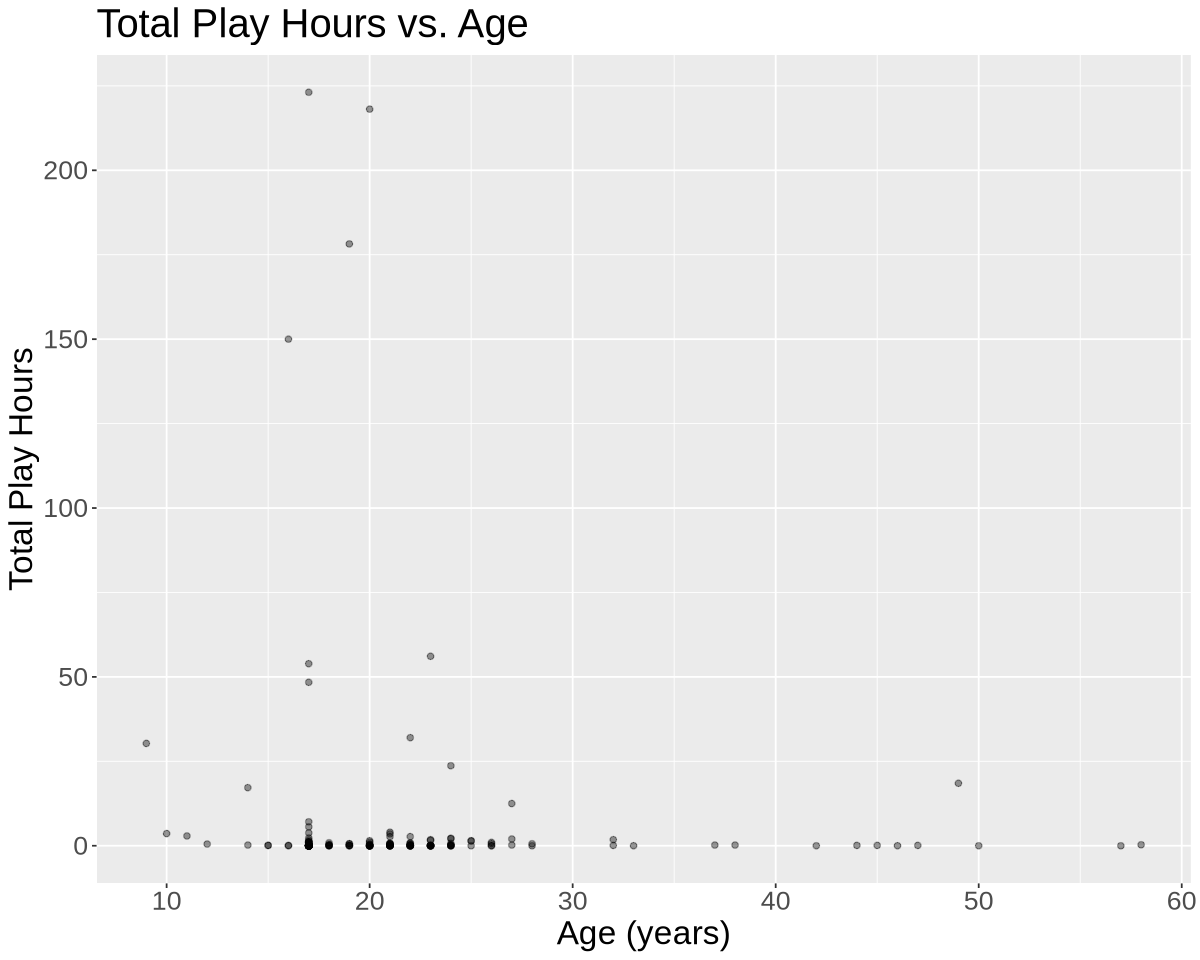

In [26]:
# Set the plot size
options(repr.plot.width = 10, repr.plot.height = 8)

# Scatter plot of total play hours vs. age
hours_vs_age_plot <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    labs(title = "Total Play Hours vs. Age", 
         x = "Age (years)",
         y = "Total Play Hours") +
    theme(text = element_text(size = 20))
hours_vs_age_plot

#### 4. Mean total play hours by gender (bar graph):

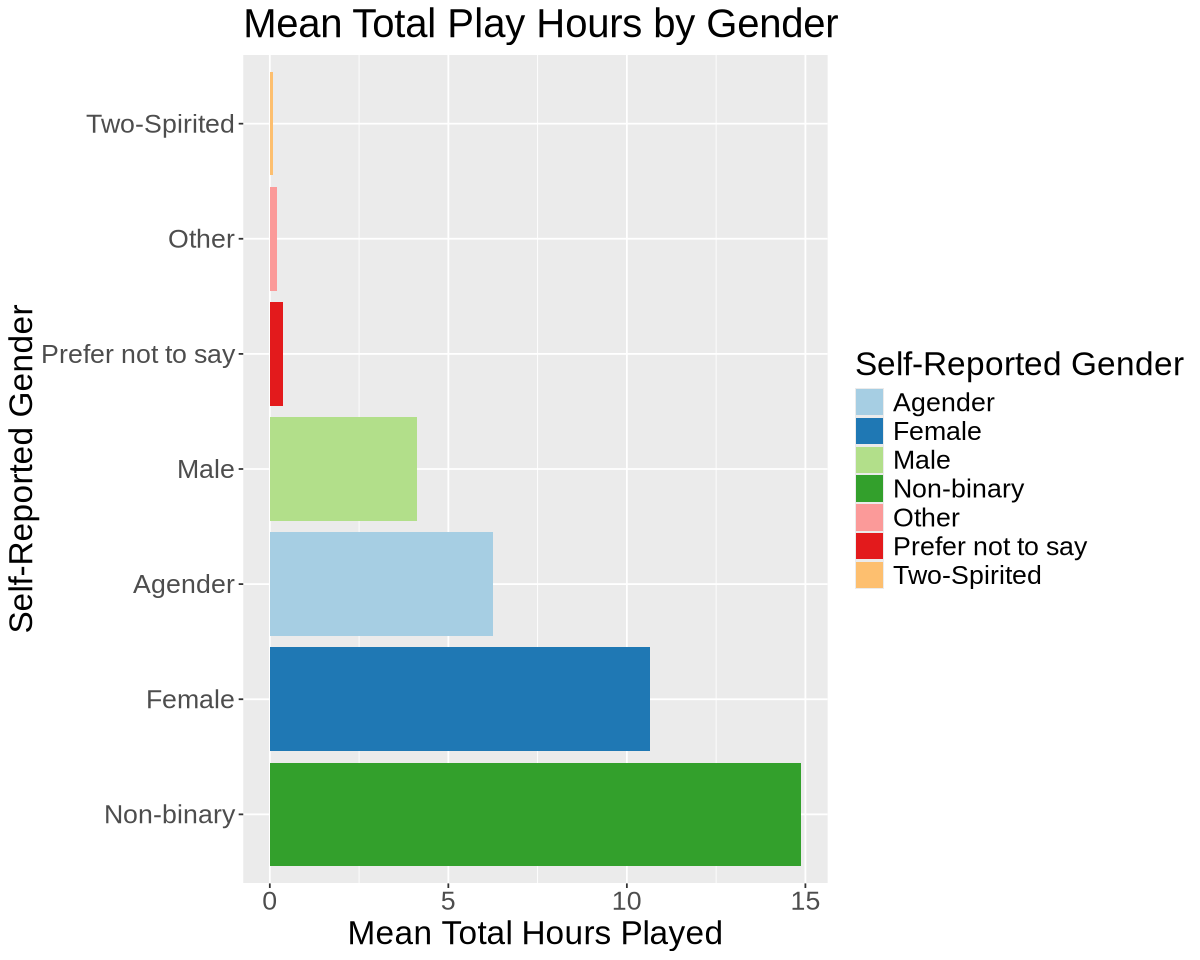

In [27]:
# Summarize the mean total play hours by experience level
mean_hours_by_gender <- players |>
    group_by(gender) |>
    summarize(mean_hours = mean(played_hours, na.rm = TRUE))

# Set the plot size
options(repr.plot.width = 10, repr.plot.height = 8)

# Bar plot of mean hours by experience level
mean_hours_by_gender_plot <- mean_hours_by_gender |>
    ggplot(aes(x = mean_hours, y = fct_reorder(gender, mean_hours, .desc = TRUE), fill = gender)) + # fill bars according to gender
    geom_bar(stat = "identity") +  # tell ggplot to use given y values instead of count for determining bar height
    labs(title = "Mean Total Play Hours by Gender",
         x = "Mean Total Hours Played",
         y = "Self-Reported Gender", 
         fill = "Self-Reported Gender") + # label the legend of the fill variable
         scale_fill_brewer(palette = 'Paired') + # apply a colour-blind-friendly palette
         theme(text = element_text(size = 20))
mean_hours_by_gender_plot

## 5. GitHub Repository